# **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the dataset into python environment**

In [2]:
data=pd.read_csv('/content/titanic_dataset .csv',index_col="PassengerId")

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Basic details of data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.shape

(891, 11)

In [7]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# **Pre processing**

In [8]:
#checking for missing values
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Handling missing value

In [9]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [10]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
# Drop the 'Cabin' column as it has too many missing values
data.drop(columns=['Cabin'], inplace=True)

In [12]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [13]:
#Dropping columns which are not usefull
drop_col=['Name','Ticket']
data= data.drop(drop_col,axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


# Handling with outliers

In [14]:
num_cols = data.select_dtypes(include=['float','int64'])

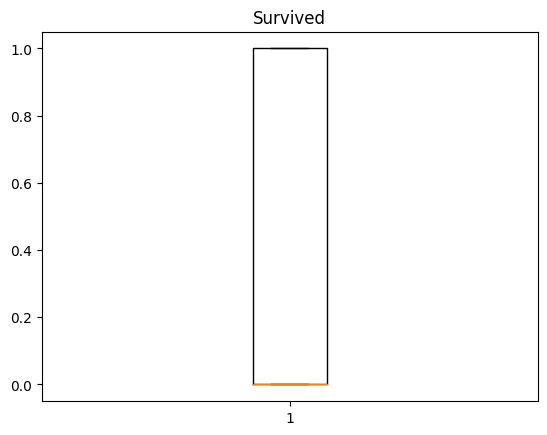

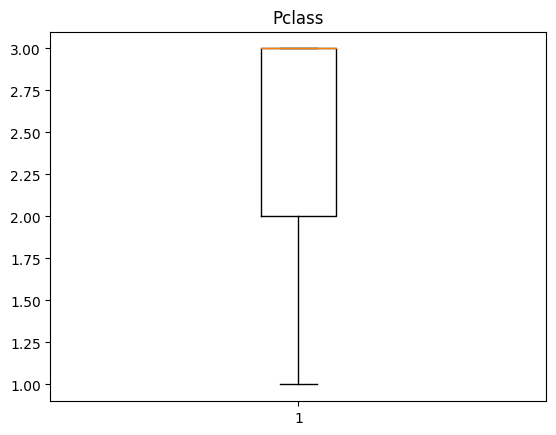

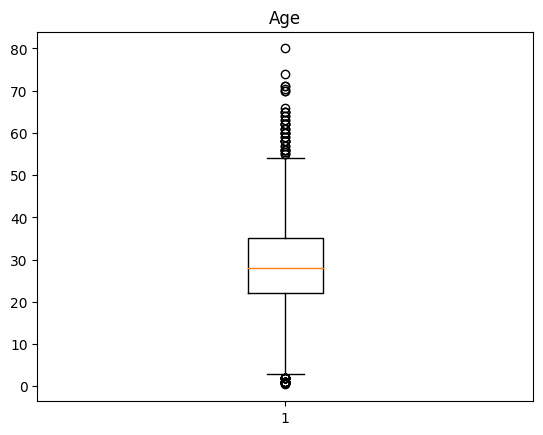

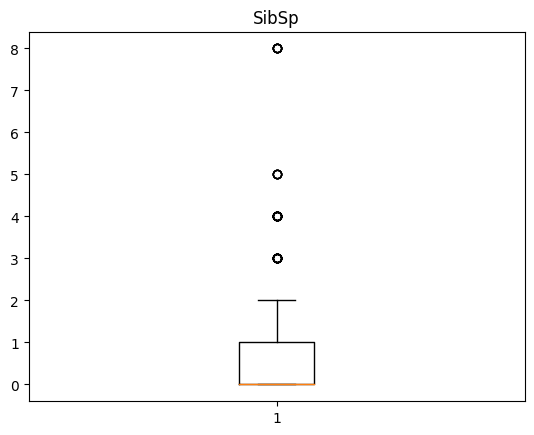

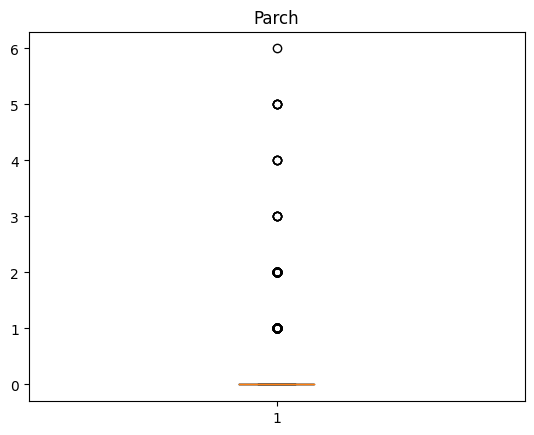

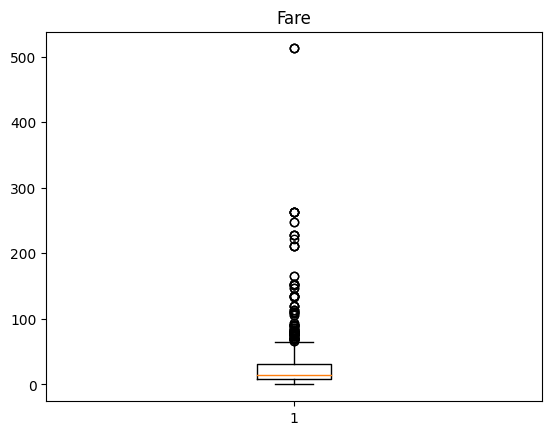

In [15]:
for i in num_cols:
 plt.figure()
 plt.boxplot(data[i])
 plt.title(i)

IQR = 13.0
lower whisker:  2.5
upper whisker:  54.5
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


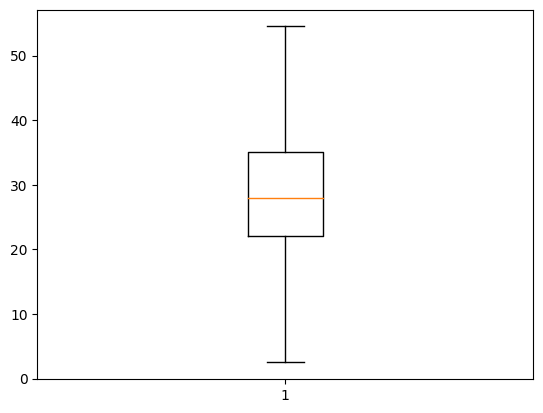

In [16]:
#Handling outlier of the column:Age
Q1 = np.percentile(data['Age'],25,method='midpoint')
Q3 = np.percentile(data['Age'],75,method='midpoint')
IQR = Q3-Q1
print('IQR =',IQR)
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
print("lower whisker: ",low_lim)
print("upper whisker: ",up_lim)
outlier =[]
for x in data['Age']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)
print(outlier)
data['Age'] = data['Age'].clip(lower=low_lim,upper=up_lim)
plt.boxplot(data['Age'])
plt.show()

IQR = 1.0
lower whisker:  -1.5
upper whisker:  2.5
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


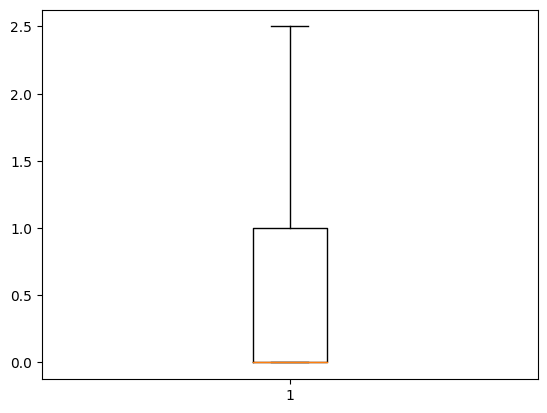

In [17]:
#Handling outlier of the column:SibSp
Q1 = np.percentile(data['SibSp'],25,method='midpoint')
Q3 = np.percentile(data['SibSp'],75,method='midpoint')
IQR = Q3-Q1
print('IQR =',IQR)
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
print("lower whisker: ",low_lim)
print("upper whisker: ",up_lim)
outlier =[]
for x in data['SibSp']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)
print(outlier)
data['SibSp'] = data['SibSp'].clip(lower=low_lim,upper=up_lim)
plt.boxplot(data['SibSp'])
plt.show()

IQR = 23.0896
lower whisker:  -26.724
upper whisker:  65.6344
[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


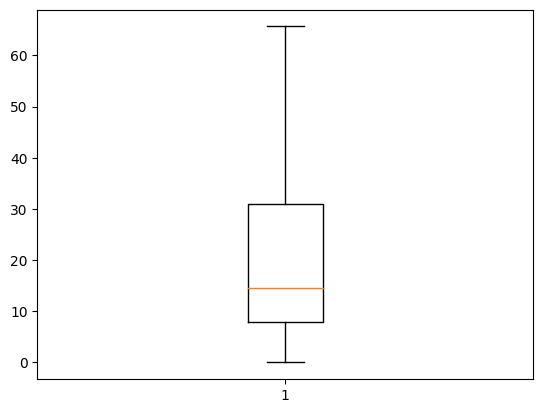

In [18]:
#Handling outlier of the column:Fare
Q1 = np.percentile(data['Fare'],25,method='midpoint')
Q3 = np.percentile(data['Fare'],75,method='midpoint')
IQR = Q3-Q1
print('IQR =',IQR)
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
print("lower whisker: ",low_lim)
print("upper whisker: ",up_lim)
outlier =[]
for x in data['Fare']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)
print(outlier)
data['Fare'] = data['Fare'].clip(lower=low_lim,upper=up_lim)
plt.boxplot(data['Fare'])
plt.show()

IQR = 0.0
lower whisker:  0.0
upper whisker:  0.0
[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 4, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 5, 2, 1, 1, 1, 2, 1, 5, 2, 1, 1, 1, 2, 1, 6, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 5, 2]


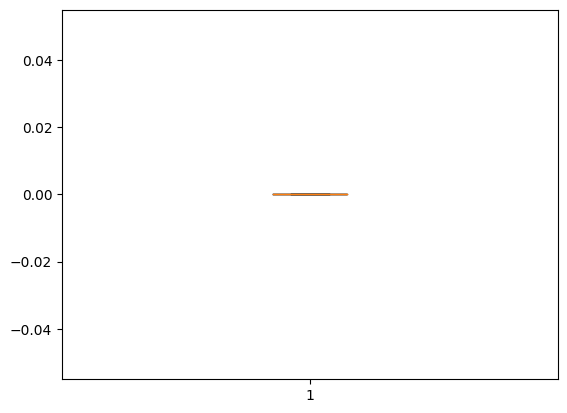

In [19]:
#Handling outlier of the column:Parch
Q1 = np.percentile(data['Parch'],25,method='midpoint')
Q3 = np.percentile(data['Parch'],75,method='midpoint')
IQR = Q3-Q1
print('IQR =',IQR)
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
print("lower whisker: ",low_lim)
print("upper whisker: ",up_lim)
outlier =[]
for x in data['Parch']:
  if((x<low_lim) or (x>up_lim)):
    outlier.append(x)
print(outlier)
data['Parch'] = data['Parch'].clip(lower=low_lim,upper=up_lim)
plt.boxplot(data['Parch'])
plt.show()

# Encode categorical variables

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [21]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp       float64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

# Split the data into features and target variable

In [22]:

X = data.drop(columns=['Survived'])
y = data['Survived']

# Standardize the features

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the data into training and testing sets

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Creating kNN and SVM Models**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
# Optimize k value for kNN model
metric_k = []
neighbors = np.arange(1, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)

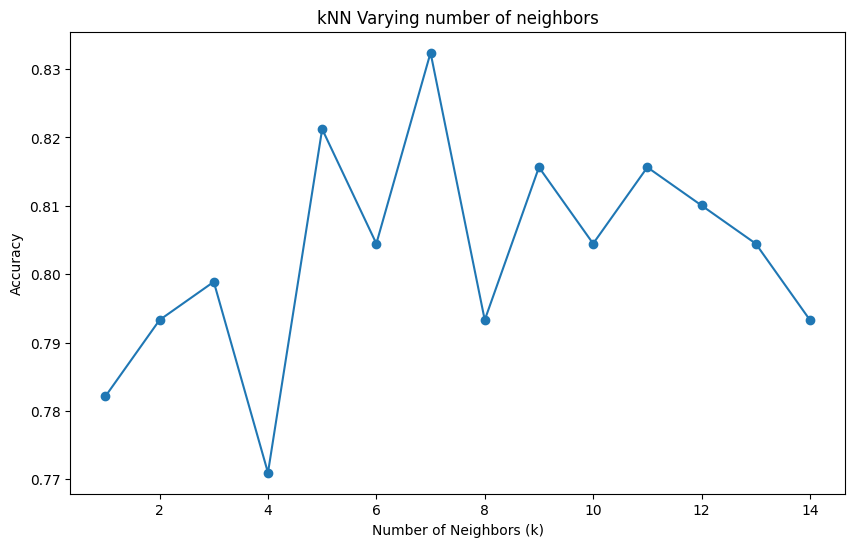

In [28]:
# Plot the accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(neighbors, metric_k, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Varying number of neighbors')
plt.show()

In [29]:
classifier = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))

Accuracy is 0.8324022346368715


In [30]:
# Create models with the optimized k
knn_model = KNeighborsClassifier(n_neighbors=7,metric='euclidean')

In [31]:
#creaing model with svm
svm_model = SVC(kernel='linear')

#**k-Fold Cross Validation**

In [32]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluating kNN & SVM models using k -Fold Cross Validation

In [33]:

k_fold_scores_knn = cross_val_score(knn_model, X_scaled, y, cv=kf,scoring='accuracy')
k_fold_scores_svm = cross_val_score(svm_model, X_scaled, y, cv=kf,scoring='accuracy')

print("k-Fold Cross Validation - kNN Average  Accuracy: ", k_fold_scores_knn.mean())
print("k-Fold Cross Validation - SVM  Average Accuracy: ", k_fold_scores_svm.mean())

k-Fold Cross Validation - kNN Average  Accuracy:  0.804681647940075
k-Fold Cross Validation - SVM  Average Accuracy:  0.7867290886392009


# **Stratified k-Fold Cross Validation**

In [34]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits = 10,shuffle=True, random_state=42)

# Evaluating kNN & SVM models using Stratified k-Fold Cross Validation

In [35]:


stratified_k_fold_scores_knn = cross_val_score(knn_model, X_scaled, y, cv=skfold_validator,scoring='accuracy')
stratified_k_fold_scores_svm = cross_val_score(svm_model, X_scaled, y, cv=skfold_validator,scoring='accuracy')

print("Stratified k-Fold Cross Validation - kNN Average Accuracy: ", stratified_k_fold_scores_knn.mean())
print("Stratified k-Fold Cross Validation - SVM Average Accuracy: ", stratified_k_fold_scores_svm.mean())

Stratified k-Fold Cross Validation - kNN Average Accuracy:  0.8069288389513108
Stratified k-Fold Cross Validation - SVM Average Accuracy:  0.7867041198501872
